# Modeling

In this notebook we will use the data we created in our [feature engineering](feature-engineering.ipynb) notebook and train our models to gain insight on our data and what what factors affect user adoption the most

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import OneHotEncoder
import pickle

%matplotlib inline
sns.set(font_scale=2)


feature_file = 'relax-features.csv'
label_column = "adopted"
random_state = 1

In [2]:
data = pd.read_csv(feature_file)

labels = data[label_column]
features = data.drop(label_column, axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels,
                                                   random_state = random_state)

In [4]:
svc = LinearSVC(class_weight='balanced',
               verbose = 1,
               random_state = 1,
               max_iter = 100000)
svc.fit(X_train, y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=1)

In [5]:
y_predict = svc.predict(X_test)

# Model Accuracy

OK, we are at 86% - that's pretty good

In [6]:
print(f'Model Accuracy: {accuracy_score(y_test, y_predict)}')

Model Accuracy: 0.8620113598396258


In [7]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2586
           1       0.50      0.77      0.60       407

    accuracy                           0.86      2993
   macro avg       0.73      0.82      0.76      2993
weighted avg       0.90      0.86      0.87      2993



In [8]:
confusion_matrix(y_test, y_predict)

array([[2268,  318],
       [  95,  312]])

# Evaluating Coefficients

* org_id has the biggest impact on whether user is adopted or not - top 20 coeffients are org_id's


In [9]:
coefs = pd.DataFrame(svc.coef_, columns=features.columns).T. \
                        rename({0: "coef"}, axis=1)

coefs["coef_abs"] = coefs["coef"].abs()
coefs = coefs.sort_values("coef_abs", ascending=False)
coefs.head(10)

,coef,coef_abs
org_id_386,-2.098282,2.098282
org_id_375,-1.892421,1.892421
org_id_151,-1.462355,1.462355
org_id_22,-1.461659,1.461659
org_id_312,-1.401657,1.401657
org_id_362,-1.351844,1.351844
org_id_279,-1.350609,1.350609
org_id_93,-1.288884,1.288884
org_id_146,-1.239358,1.239358
org_id_65,-1.206788,1.206788


### Orgs most likely to adopt

In [74]:
coefs_t = coefs.T
org_cols = [i for i in coefs_t if i.startswith("org_id_")]
coefs_org_id = coefs_t[org_cols]
coefs_org_id.T.sort_values("coef", ascending=False).head(10)

,coef,coef_abs
org_id_273,1.127205,1.127205
org_id_306,1.104977,1.104977
org_id_358,1.103754,1.103754
org_id_403,0.976948,0.976948
org_id_366,0.925608,0.925608
org_id_395,0.912989,0.912989
org_id_235,0.901747,0.901747
org_id_266,0.875664,0.875664
org_id_119,0.831412,0.831412
org_id_218,0.814289,0.814289


### Orgs least likely to adopt

In [75]:
coefs_org_id.T.sort_values("coef", ascending=True).head(10)

,coef,coef_abs
org_id_386,-2.098282,2.098282
org_id_375,-1.892421,1.892421
org_id_151,-1.462355,1.462355
org_id_22,-1.461659,1.461659
org_id_312,-1.401657,1.401657
org_id_362,-1.351844,1.351844
org_id_279,-1.350609,1.350609
org_id_93,-1.288884,1.288884
org_id_146,-1.239358,1.239358
org_id_65,-1.206788,1.206788


In [10]:
coefs_t = coefs.T
org_cols = [i for i in coefs_t if i.startswith("org_id_")]
coefs_t.drop(org_cols, axis=1).T.sort_values("coef_abs", ascending=False)

,coef,coef_abs
"dte_[14, 101)",-0.914631,0.914631
engagements_first_30,0.663379,0.663379
cy_2014,-0.489363,0.489363
cm_5,-0.459906,0.459906
cm_4,-0.257075,0.257075
cs_signup,-0.220629,0.220629
cs_personal_projects,-0.190675,0.190675
cs_signup_google_auth,-0.190067,0.190067
invited,-0.152426,0.152426
cy_2013,-0.147012,0.147012


### Best Orgs for Adoption

In [11]:
org_df = coefs_t[org_cols].T
org_df[org_df.coef > 0].sample(10)

,coef,coef_abs
org_id_8,0.246177,0.246177
org_id_115,0.051910,0.051910
org_id_376,0.226117,0.226117
org_id_44,0.592448,0.592448
org_id_106,0.512044,0.512044
org_id_239,0.287159,0.287159
org_id_71,0.082019,0.082019
org_id_95,0.453288,0.453288
org_id_49,0.559239,0.559239
org_id_24,0.480783,0.480783


### First Logins After Account Creation

* Users that don't log in within 14 days are not likely to adopt
* users that log in 2 or 3 days after account creation are likely to adopt
* Other timeframes, have little impact on the model

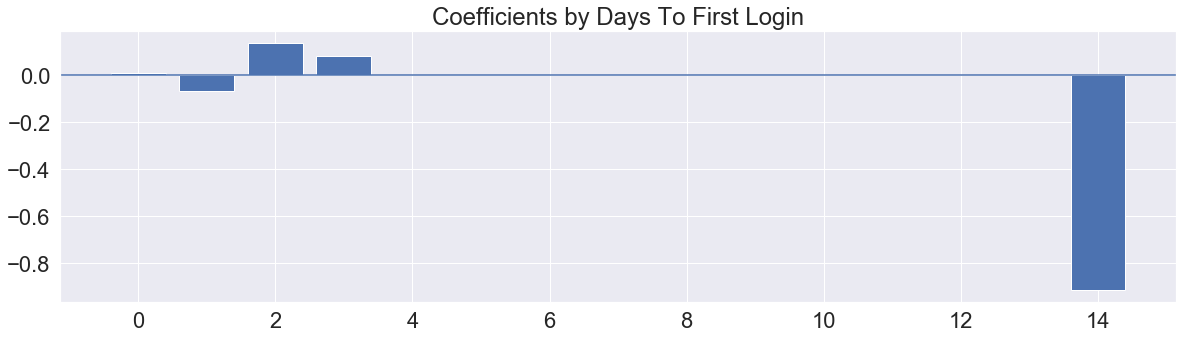

In [45]:
import re

dte_cols = [i for i in coefs_t if i.startswith("dte_")]
coefs_dte = coefs_t[dte_cols].T.reset_index(). \
                        rename({"index": "key"}, axis=1)
coefs_dte["days_to_first_login"] = coefs_dte.key.apply(lambda x:
                                                      re.search(r'[0-9]+', x)[0]). \
                                                        astype(int)
coefs_dte = coefs_dte.sort_values("days_to_first_login")

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = plt.bar(x=coefs_dte["days_to_first_login"], height=coefs_dte["coef"])
_ = plt.title("Coefficients by Days To First Login")
_ = a.axhline(0)

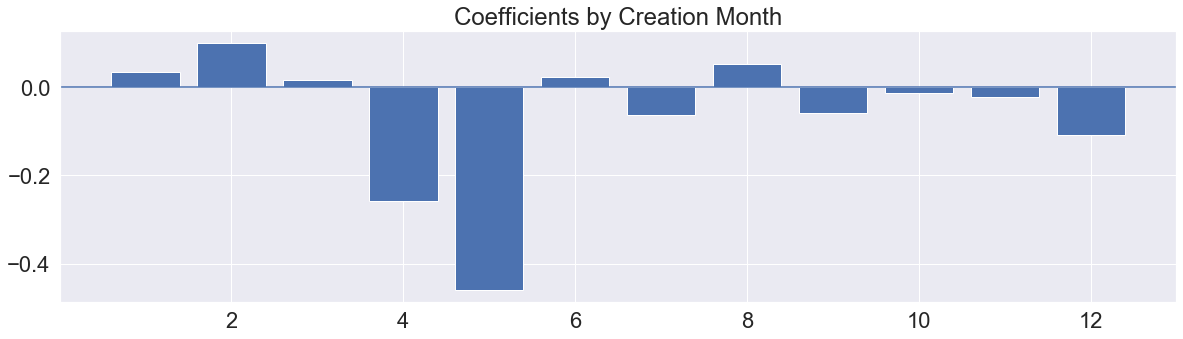

In [47]:
cm_cols = [i for i in coefs_t if i.startswith("cm_")]
coefs_cm = coefs_t[cm_cols].T.reset_index().rename({"index": "key"}, axis=1)
coefs_cm["month"] = coefs_cm.key.apply(lambda x: x.split("_")[1]).astype(int)
coefs_cm = coefs_cm.sort_values("month")

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = plt.bar(x=coefs_cm["month"], height=coefs_cm["coef"])
_ = plt.title("Coefficients by Creation Month")
_ = a.axhline(0)

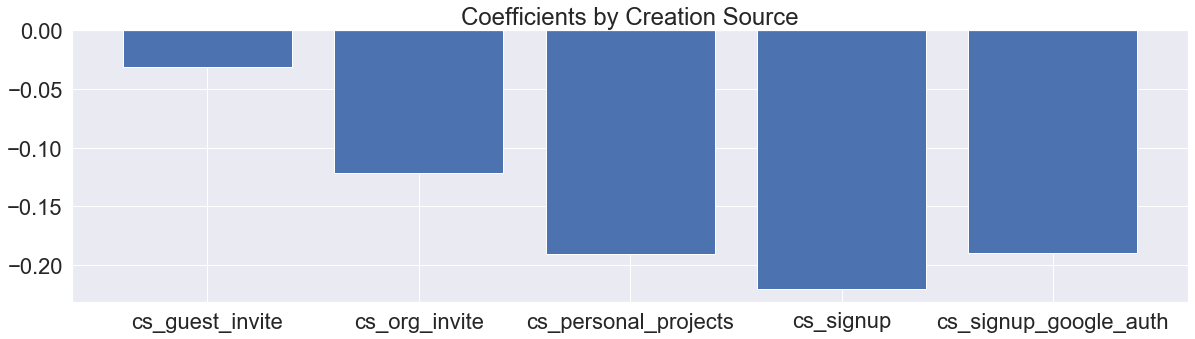

In [48]:
cs_cols = [i for i in coefs_t if i.startswith("cs_")]
coefs_cs = coefs_t[cs_cols].T.reset_index().sort_values("index"). \
                    rename({"index": "key"}, axis=1)

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = plt.bar(x=coefs_cs["key"], height=coefs_cs["coef"])
_ = plt.title("Coefficients by Creation Source")
_ = a.axhline(0)

# Remove Some Features

Remove least significant features and re-run our model to see if performance improves

Features that did not have significant impact on our models are:
* enabled_for_marketing_drip
* opted_in_to_mailing_list
* invited

### Results

There is little impact to the model score after removing these columns from our data

In [55]:
features2 = features.drop(["enabled_for_marketing_drip", 
                  "opted_in_to_mailing_list",
                          "invited"], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, 
                                                    labels,
                                                   random_state = random_state)

In [56]:
svc2 = LinearSVC(class_weight='balanced',
               verbose = 1,
               random_state = 1,
               max_iter = 100000)
svc2.fit(X_train2, y_train2)
y_predict2 = svc2.predict(X_test2)
print(f'Model Accuracy: {accuracy_score(y_test2, y_predict2)}')

[LibLinear]Model Accuracy: 0.8623454727697962


# Removing org_id

org_id creates over 400 features which may be introducing noise in our model. Let's remove these and see how our model performs

### Result

Our model improved from 82% to 91% when we remove org_id from our features

I suspect that while some orgs are helpful in predicting user adoption, most orgs just introduce noise in our model

As you can see in the histogram below, most coefficients for org_id have values between -0.5 to 0.5. Very few have val

In [61]:
features3 = features.drop(["enabled_for_marketing_drip", 
                  "opted_in_to_mailing_list",
                          "invited"] + org_cols, axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(features3, 
                                                    labels,
                                                   random_state = random_state)
svc3 = LinearSVC(class_weight='balanced',
               verbose = 1,
               random_state = 1,
               max_iter = 100000)
svc3.fit(X_train3, y_train3)
y_predict3 = svc3.predict(X_test3)
print(f'Model Accuracy: {accuracy_score(y_test3, y_predict3)}')

[LibLinear]Model Accuracy: 0.9117941864350151


In [73]:
coefs3 = pd.DataFrame(svc3.coef_, columns=features3.columns).T. \
                        rename({0: "coef"}, axis=1)
coefs3["coef_abs"] = coefs3.coef.apply(lambda x: abs(x))
coefs3.sort_values("coef_abs", ascending=False)

,coef,coef_abs
engagements_first_30,0.598539,0.598539
"dte_[14, 101)",-0.454228,0.454228
cy_2014,-0.406933,0.406933
cm_5,-0.370563,0.370563
cm_4,-0.214715,0.214715
cs_org_invite,-0.171251,0.171251
cs_signup,-0.122371,0.122371
"dte_[1, 2)",-0.116346,0.116346
cs_signup_google_auth,-0.114796,0.114796
cy_2013,-0.113331,0.113331


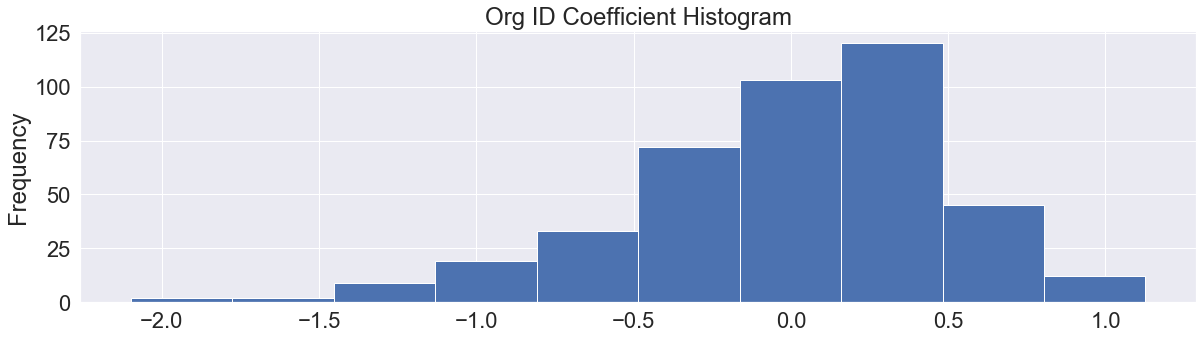

In [87]:
f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = coefs_org_id.T[["coef"]].plot(kind='hist', legend=False, ax=a)
_ = a.set_title("Org ID Coefficient Histogram")